# Physics 77/88 - Fall 2024 - Homework 6 
## Random Numbers II 
*Submit this notebook to bCourses to receive a credit for this assignment.*
<br>
due: **Oct 30th 2024** 
<br>
**Please upload both, the .ipynb file and the corresponding .pdf**
<br>
## Problem 1 (25P)

Write a new script **random_machine_Boltzmann.py** based on **random_machine.py** from the previous week, but this time make sure that the **total(!) number of pips/states on the dice stays constant** throughout the simulation!<br>
You can achive that by rolling a randomly choosen die (as before), calculate the difference $d$ between its new state and its current state, for example $d= +3$, and then substract $1$ from three randomly choosen dice. If $d$ is negative, the values have to be added. Make sure, that no die has a state less than $1$.<br>
Hint: the plots should now look similar to the plots shown below:<br>

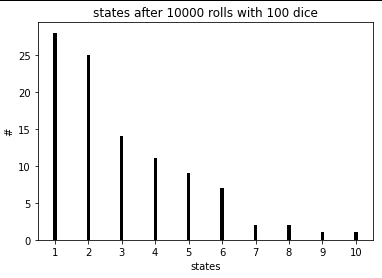
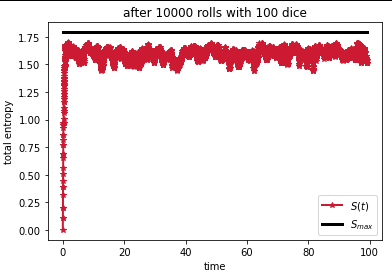

- What do you observe now?<br> 
- Does the entropy of the system reach its theoretical maximum?<br>
- What do you think which distribution best describes the histogram of the states now?<br>

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 16 02:55:48 2024

@author: MMH_user
"""

import numpy as np
import matplotlib.pyplot as plt

#function illustrates the increase of entropy by rolling ONE die among N 
#dice each of M time steps by starting with a homogenious set and evolving
#with a poissonian time keeper (Gillespie alg)

def random_machine_Boltzmann(N, M):
    
    I = 6 #number of states: I = 6 for a die

    #N dice, all set to state "three" for t=1
    Dice    = 3*np.ones((N,M))
    Entropy = np.zeros((M))
    
    Emax    = np.log(I)#max entropy
    e_calc  = np.zeros((I))
    
    #SETTING TIME
    #generate M random numbers between 0 and 1 (uniformly dist)
    R      = np.random.uniform(0,1,(M,1))
    Tau    = -np.log(R)/N
    T      = np.cumsum(Tau)
    
    #generate M random numbers between 0 and N-1 (uniformly dist)
    #for choosing die for every time step
    R_dice = np.random.randint(0,N,(M))
    
    #SETTING STATE of one randomly choosen die
    #generate M random numbers between 1 and I (uniformly dist)
    
    #choose die
    for i in range(M):#over time
    
        idx_die           = R_dice[i]
        current_state_die = Dice[idx_die, i]
        #picking energy from current die
        new_state_die     = np.random.randint(1, current_state_die+1)
        
        dE                = int(new_state_die - current_state_die)
        sign              = dE/abs(dE + 1e-300)
        
        if dE !=0:
            
            Dice[idx_die, i:] = new_state_die
            
            #re-distributing energy randomly
            for e in range(abs(dE)):
                e_next = -1
                while e_next <1: #making sure that no die has negative energy 
                    idx    = np.random.randint(0,N)
                    e_now  = Dice[idx, i]
                    e_next = -sign + e_now
                Dice[idx, i:] = e_next
        
        #calculating entropy
        for j in range(I):
            e_calc[j] = (Dice[:,i] == j+1).sum()/N + 1e-300 #avoiding log(0)
            
            
        Entropy[i] =  -np.dot(e_calc,np.log(e_calc))
        
    
    #plotting histogram of states
    labels, counts = np.unique(Dice[:,-1], return_counts = True)
    plt.bar(labels, counts, align = 'center', width = 0.1, color = 'k')
    plt.gca().set_xticks(labels)
    plt.xlabel('states')
    plt.ylabel('#')
    plt.title('states after ' + str(M) + ' rolls with ' + str(N) + ' dice')
    plt.show()
    
    #plotting evolution of entropy
    plt.plot(T, Entropy, '-*', linewidth = 2, color = [0.8, 0.1, 0.2],\
             label = '$S(t)$')
    plt.plot([0, T[-1]], [Emax, Emax], 'k-', linewidth = 3, label = '$S_{max}$')
    plt.xlabel('time')
    plt.ylabel('total entropy')
    plt.title('after ' + str(M) + ' rolls with ' + str(N) + ' dice')
    plt.legend()
    plt.show()

    return Dice

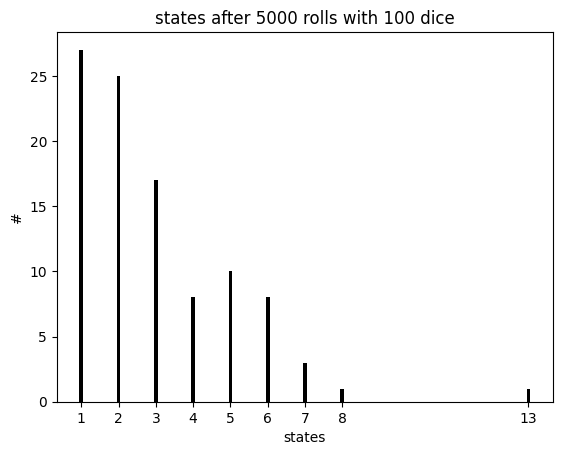

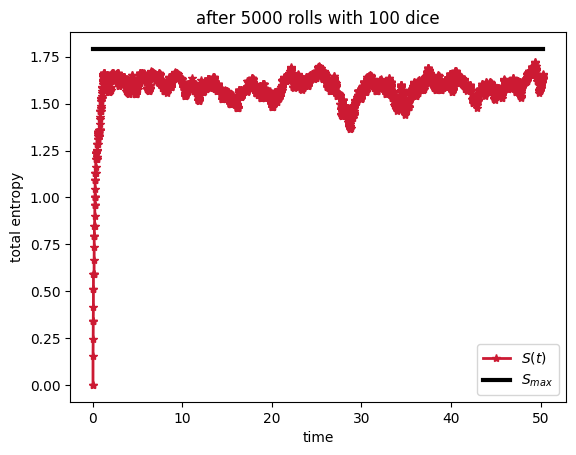

In [5]:
D = random_machine_Boltzmann(100, 5000)

The process shows the same dynamics but with the difference, that the theoretical maximum is not reached. The reason is the constrain $E_{tot} = const$. The result is the Boltzmann distribution. High energy states are less likely than low energy states. The gap between theoretical maximum and the maximum reached in the simulation can be explained by $F = U - TS$, where $F$ is the Free Energy, $U = E_{tot}$ the Internal Energy and $T = 1$.